## Data Analysis and Machine Learning

Basic steps in carrying out a machine larning project:
1. Data cleaning and formatting
2. Exploratory data analysis
3. Feature engineering and selection
4. Compare several machine learning models on a performance metric
5. Perform hyperparameter tuning on the best model
6. Evaluate the best model on the testing set
7. Interpret the model results
8. Draw conclusions and document work

### 1. Data Preparation

In [23]:
# import modules
import pandas as pd
import numpy as np
import re
import nltk
import string
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /home/jtao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jtao/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
# absolute path of the data file
data_file='data/nicksantino.csv'

In [ ]:
# Read in data into a dataframe 
data = pd.read_csv(data_file)

In [ ]:
# check column information and make sure the key columns 
# are numerical numbers.
data.info()

# if not, use astype method to convert.
#data[col] = data[col].astype(float) 

In [ ]:
# display the first 5 rows of the dataframe.
data.head(5)

In [ ]:
# Happy Emoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
 
# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])
 
# all emoticons (happy + sad)
emoticons = emoticons_happy.union(emoticons_sad)

stemmer = nltk.stem.PorterStemmer()
stopwords_english = nltk.corpus.stopwords.words('english')

In [ ]:
def clean_tweets(tweet):
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
 
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
 
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
 
    # tokenize tweets
    tokenizer = nltk.TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
 
    tweets_clean = []    
    for word in tweet_tokens:
        if (word not in stopwords_english and # remove stopwords
              word not in emoticons and # remove emoticons
                word not in string.punctuation): # remove punctuation
            #tweets_clean.append(word)
            stem_word = stemmer.stem(word) # stemming word
            tweets_clean.append(stem_word)
 
    return tweets_clean

In [ ]:
cleaned_tokens=[]
all_tokens=[]
for i in data["text"]:
    cleaned_tokens.append(clean_tweets(i))
for i in cleaned_tokens:
    all_tokens=all_tokens+i    

In [ ]:
category_dict={}
category_dict['sadness']  = ['sad','depressed']
category_dict['surprise'] = ['omg','what','believe']
category_dict['anger'] = ['hate', 'fuck', 'stupid']
category_dict['anxiety'] = ['fear', 'stress', 'anxiety']
category_dict['happyness'] = ['love', 'happy', 'glad']
sadness_tweet = set()
surprise_tweet = set()
anger_tweet = set()
anxiety_tweet = set()
happyness_tweet = set()

for index, row in data.iterrows():
    items = row["text"]
    cleaned_token = clean_tweets(items)
    if set(category_dict['happyness']) & set(cleaned_token):
        happyness_tweet.add(index)
    if set(category_dict['surprise']) & set(cleaned_token):
        surprise_tweet.add(index)
    if set(category_dict['surprise']) & set(cleaned_token):
        surprise_tweet.add(index)
        
#        if set(category_dict['commodity']) & items_tweet:
#            commodity_tweet.add(items.get('tweet_text')

In [ ]:
print(surprise_tweet)

In [ ]:
print(data["text"][87])

### 2. Exploratory Data Analysis

In [21]:
nltk.pos_tag(cleaned_tokens[1])

[('omg', 'NN'),
 ('name', 'NN'),
 ('youtub', 'JJ'),
 ('video', 'NN'),
 ('alex', 'JJ'),
 ('gaskarth', 'NN'),
 ('play', 'NN'),
 ('ping', 'VBG'),
 ('pong', 'JJ'),
 ('1', 'CD'),
 ('second', 'JJ'),
 ('nick', 'JJ'),
 ('santino', 'NN'),
 ('pull', 'NN'),
 ('pant', 'NN')]

In [22]:
fdist=nltk.probability.FreqDist(all_tokens)
print(fdist)
fdist.most_common(20)

<FreqDist with 540 samples and 1311 outcomes>


[('love', 35),
 ('nick', 33),
 ('rt', 33),
 ('happi', 30),
 ('anniversari', 26),
 ("i'm", 21),
 ('mom', 20),
 ('dad', 20),
 ('santino', 18),
 ('27th', 17),
 ('guy', 15),
 ('two', 14),
 ('reason', 14),
 ('come', 13),
 ('get', 13),
 ('grate', 13),
 ('see', 12),
 ('..', 12),
 ('u', 10),
 ('back', 10)]

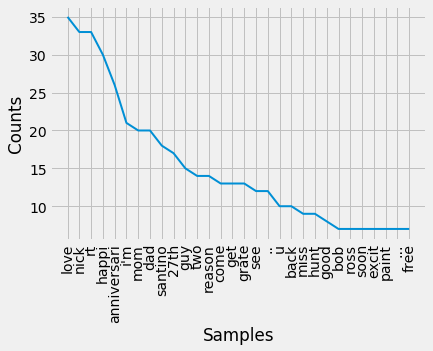

In [25]:
fdist.plot(30,cumulative=False)